# Projection between vectors

Consider two vectors $a$ and $b$, and the projection of $b$ on $a$ is $p$. Then $a$ should orthogonal to $e$ which is the error between $b$ and its projection $p = ax$.

$$a\perp e\Rightarrow a^T e = a^T (b- ax) = a^Tb - a^Tax = 0$$

Then the value of $x$ is given by

$$x = \frac{a^T b}{a^T a}$$

And the projection vector is 
$$p = x a = \frac{a a^T b }{a^T a} = \frac{a a^T}{a^T a}b$$

where $P=\frac{a a^T}{a^T a}$ is called the *projection matrix*.
$$P =\begin{bmatrix}
a_1 a_1 & a_1 a_2 &\cdots & a_1a_n\\
a_2 a_1 & a_2 a_2 &\cdots & a_2a_n\\
\vdots &\vdots &\ddots &\vdots\\
a_n a_1 & a_n a_2 &\cdots & a_na_n\\
\end{bmatrix}/a^T a$$

Projection matrix property

1. $Pb$ can be intepreted as the linear combination of the column vectors of $p$. So $Pb$ is in the column space of $P$. However, the rank (independent vectors) of the column space of $P$ is $1$, just one dimension.
2. As we can see, $P$ is symmetric.
3. Doing the projection twice is the same as doing the projection once. $PP = P$.


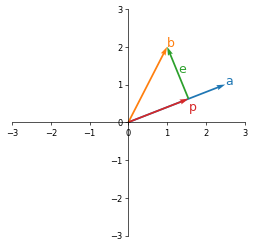

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Orig = np.array([0, 0])
a = np.array([2.5, 1])
b = np.array([1, 2])

def axesCross(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")

def set_limit(ax, limit):
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    
def main():
    fig = plt.figure(figsize=(5,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    
    axesCross(ax)
    limit = 3
    set_limit(ax, 3)
    
    ax.quiver(Orig[0], Orig[1], a[0], a[1], color="C0", angles='xy', scale=1, scale_units='xy')
    ax.quiver(Orig[0], Orig[1], b[0], b[1], color="C1", angles='xy', scale=1, scale_units='xy')
    
    p = (a.T@b)/(a.T@a)*a
    orth = b-p
    ax.quiver(p[0], p[1], orth[0], orth[1], color="C2", angles='xy', scale=1, scale_units='xy')
    ax.quiver(Orig[0], Orig[1], p[0], p[1], color="C3", angles='xy', scale=1, scale_units='xy')
    
    ax.text(a[0], a[1], "a", fontsize=15, color='C0')
    ax.text(b[0], b[1], "b", fontsize=15, color='C1')
    ax.text(p[0], p[1]-.3, "p", fontsize=15, color='C3')
    ax.text((p[0]+b[0])/2, (p[1]+b[1])/2, "e", fontsize=15, color='C2')


if __name__=="__main__":
    main()

# Why do we need projection

Because $Ax = b$ may have no solution, say $b$ is not in the column space of $A$. Instead, we solve $A\hat{x} = p$, where $p$ is the projection of $b$ onto the column space of $A$, and $p$ is also the vector in the column space that is nearest to $b$.

# Projection of vector onto subspace

However, different from the projection between vectors we mentioned above, $A$ is a column space with multiple vectors. The error vector $e$ therefore need to be orthogonal to the column space of $A$.

$$\left\{\begin{array}{ll} a_1 \perp e \\ a_2 \perp e \end{array}\right.
\text{ where } \left\{\begin{array}{ll}e = b-p\\ A = [a1\ a2]\end{array}\right.$$

And the projection vector $p$ is in the column space of $A$

$$p = a_1\hat{x}_1 + a_2\hat{x}_2 = A\hat{x}$$

With these conditions, we can write the orthogonal equations in the form

$$\left\{\begin{array}{ll}
a_1^T(b-A\hat{x}) = 0\\
a_2^T(b-A\hat{x}) = 0\\
\end{array}\right.
\Rightarrow
A^T(b-A\hat{x}) = 0
\Rightarrow
A^Tb-A^TA\hat{x}=0
$$

Then the value of $\hat{x}$ is given by

$$\hat{x} = (A^TA)^{-1}A^Tb$$

The projection vector is therefore

$$p = A(A^TA)^{-1}A^Tb$$

*The reason why $b$ is not in the column space of $A$ is that such column space is just a subspace of the whole space. For example, assume that $A$ is a $3\times 2$ matrix. Its column space is just a plane, while the whole space is a 3-Dimensional space. And this is also the reason why $(A^TA)^{-1}$ cannot be factorized.*

C:\OtherProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in less


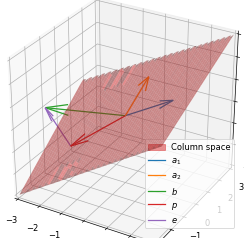

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

Orig = [0, 0, 0]
a1 = np.array([1, 2, 0])
a2 = np.array([1, 0, 2])
A = np.array([a1, a2]).T
b = np.array([-3, -1, 0])

def set_limit(ax, limit):
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)

def crop(x, limit):
    x[x>limit]  = np.nan
    x[x<-limit] = np.nan
    
def main():
    fig = plt.figure(figsize=(5,5), dpi=60)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    limit = 3
    set_limit(ax, 3)
    ax.set_zlim(-limit, limit)
    
    x = np.linspace(-3,3,10)
    
    p = A@np.linalg.inv(A.T@A)@A.T@b
    e = b - p
    
    legend = np.full(1,100)
    a1l, = ax.plot(legend, legend, legend, color='C0', label=r'$a_1$')
    a2l, = ax.plot(legend, legend, legend, color='C1', label=r'$a_2$')
    bl, = ax.plot(legend, legend, legend, color='C2', label=r'$b$')
    pl, = ax.plot(legend, legend, legend, color='C3', label=r'$p$')
    el, = ax.plot(legend, legend, legend, color='C4', label=r'$e$')
    ax.quiver(0, 0, 0, a1[0], a1[1], a1[2], color='C0')
    ax.quiver(0, 0, 0, a2[0], a2[1], a2[2], color='C1')
    ax.quiver(0, 0, 0, b[0], b[1], b[2], color='C2')
    ax.quiver(0, 0, 0, p[0], p[1], p[2], color='C3')
    ax.quiver(p[0], p[1], p[2], e[0], e[1], e[2], color='C4')
    
    X,Y = np.mgrid[-3:3:700j,-3:3:700j]
    Z = 2.0*X - 1.0*Y
    Z[Z>3] = np.nan
    Z[Z<-3] = np.nan
    
    ax.plot_surface(X,Y,Z, color='C3', alpha=0.5)
    
    E3 = mpatches.Patch(color='C3', alpha=0.5, label="Column space")
    ax.legend(handles=[E3, a1l, a2l, bl, pl, el], loc='lower right')
    ax.dist = 8


if __name__=="__main__":
    main()
